# The Central Limit Theorem
Sample from an arbitrary distribution f(x), say N samples, and take their mean. The mean will not necessarily be the same as the mean of f(x). But if you repeat this a number of times, you'lee see that the sample means are distributed *normally* around the mean of f(x) with a standard deviation: $\sigma_N = \sigma_{f(x)}/\sqrt{N}$, where $\sigma_{f(x)}$ is the spread of the original distribution.

Assumptions: 
* initial distribution has well-defined standard deviation (tails fall of more rapidly than $x^{-2}$)
* data are uncorrelated

### CLT example

How does the spread of the sample mean change with the number of samples N? Let's compare the distributions of the sample means for N = 20 and N = 100. Let's also see how the spread of these distributions varies as a function of N.

In [5]:
# Importing Libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [10]:
# Creating the parent distribution
mu = 3.0
sigma = 2.0

# Sampling 
N1 = 20
N2 = 100

sample_means1 = [] # lists that will store the means of all Nrepeat samples
sample_means2 = []

Nrepeats = 1000
for i in range(Nrepeats):
        samples1 = stats.norm.rvs(loc=mu,scale=sigma,size=N1) # draw 1000 random N1-size samples
        samples2 = stats.norm.rvs(loc=mu,scale=sigma,size=N2) # draw 1000 random N1-size samples

        samples1_mean = np.mean(samples1)
        samples2_mean = np.mean(samples2)
        
        sample_means1.append(samples1_mean)
        sample_means2.append(samples2_mean)
        
print(np.mean(sample_means1),np.mean(sample_means2))


(3.0095427610458754, 2.9994709347595223)


Where we can see that the two means are very similar.

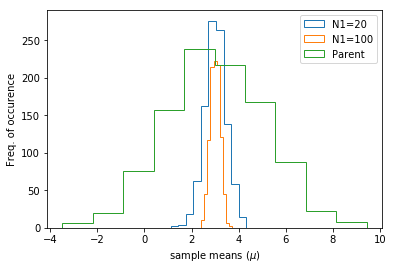

In [25]:
plt.hist(sample_means1,histtype='step',label=r'N1=20')
plt.hist(sample_means2,histtype='step',label=r'N1=100')
plt.hist(stats.norm.rvs(loc=mu,scale=sigma,size=1000),histtype='step',label=r'Parent')
plt.xlabel(r'sample means ($\mu$)')
plt.ylabel(r'Freq. of occurence')
plt.legend()
plt.show()

We can see that the spread changes with N$_{sampling}$. How does it change?

In [26]:
Ns=[5,10,20,50,100,200,500,1000]

spread_N = []

for i in Ns:
    sample_means_i = []
    Nrepeats2 = 100
    for j in range(Nrepeats2):
        samples = stats.norm.rvs(loc=mu,scale=sigma,size=i) # draw 1000 random N1-size samples
        samples_mean = np.mean(samples)
        sample_means_i.append(samples_mean)
    spread_N.append(np.std(sample_means_i))
print(spread_N)

[0.92195395894727916, 0.66271549269943486, 0.50266613016050754, 0.2632044733209094, 0.19817321997894907, 0.13288273839374357, 0.090864137048156435, 0.058865787203898907]


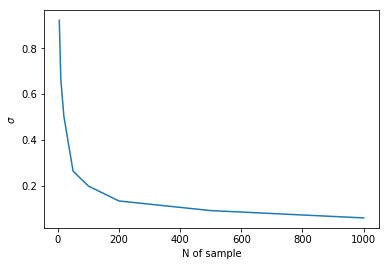

In [28]:
plt.plot(Ns,spread_N)
plt.xlabel(r'N of sample')
plt.ylabel(r'$\sigma$')
plt.show()

So the better the sampling the smaller the spread in the means ($\mu$).

In the following example we can see how CLT applies for the various distributions.

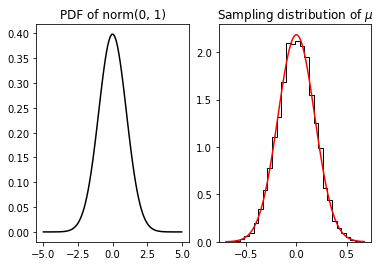

In [35]:
N = 30

dist = stats.norm(0, 1)
# dist = stats.uniform(-1, 2)
# dist = stats.dweibull(8.5)
# dist = stats.expon(1.0)
# dist = stats.lognorm(1.5, 0.5)
# dist = stats.beta(0.01, 10)

sample_means = [np.mean(dist.rvs(size = N)) for i in range(10000)]
gaussfit = stats.norm(np.mean(sample_means), np.std(sample_means))
pdf_x = np.linspace(dist.mean() - 5 * dist.std(), dist.mean() + 5 * dist.std(), 100)
pdf_y = dist.pdf(pdf_x)

plt.subplot(1, 2, 1)
plt.plot(pdf_x, pdf_y, "k-")
plt.title("PDF of " + dist.dist.name + "(" + ", ".join(map(str, dist.args)) + ")")
plt.subplot(1, 2, 2)
plt.title("Sampling distribution of $\mu$")
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, gaussfit.pdf(x), "r-")
plt.hist(sample_means, 30, normed = True, histtype = "step", color = "k")
plt.show()